In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
!gdown 1v1I7gaZakUUMxWXBsjdWJGCGZccB0iP6

Downloading...
From: https://drive.google.com/uc?id=1v1I7gaZakUUMxWXBsjdWJGCGZccB0iP6
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 48.7MB/s]


In [164]:
netflix_df = pd.read_csv("netflix.csv")

In [165]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **Data Cleaning**
* Merged multiple DataFrames (df_director, df_cast, df_country, df_listed_in, and netflix_df) into a single DataFrame (result_df) to consolidate relevant information about each title.
* Replaced empty strings with NaN in all columns of the result_df to standardize missing values for better analysis.

In [166]:
# Convert 'date_added' column to datetime format
netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: pd.to_datetime(x))

In [167]:
# Split the 'director' column by commas and store the result as a list for each row
netflix_df['director'] = netflix_df['director'].str.split(',')
# Explode the 'director' column to create a new row for each director and reset the index
# The explode function transforms the data into a more granular format, where each director is represented in a separate row, which is often required for individual analysis, such as finding the most frequent directors or aggregating data by director.
df_director = netflix_df[['title','director']].explode('director').reset_index(drop=True)

In [168]:
# Split the 'cast' column by commas and store the result as a list for each row
netflix_df['cast'] = netflix_df['cast'].str.split(',')
df_cast = netflix_df[['title','cast']].explode('cast').reset_index(drop=True)

In [169]:
# Split the 'country' column by commas and store the result as a list for each row
netflix_df['country'] = netflix_df['country'].str.split(',')
df_country = netflix_df[['title','country']].explode('country').reset_index(drop=True)

In [170]:
# Split the 'listed_in' column by commas and store the result as a list for each row
netflix_df['listed_in'] = netflix_df['listed_in'].str.split(',')
df_listed_in = netflix_df[['title','listed_in']].explode('listed_in').reset_index(drop=True)

In [171]:
# Merge df_director,df_country,df_listed_in and df_cast on the 'title' column, using an outer join to keep all records
result_df = pd.merge(df_director, df_cast, on='title', how='outer')
result_df = pd.merge(result_df, df_country, on='title', how='outer')
result_df = pd.merge(result_df, df_listed_in, on='title', how='outer')

In [172]:
# Merges the current result_df with the original netflix_df to include all columns from netflix_df, based on the title column.
result_df = pd.merge(result_df, netflix_df, on='title', how='outer')

In [173]:
# Drop unnecessary columns that have a '_y' suffix, which were likely created during the merge (duplicate columns)
result_df = result_df.drop(columns=['director_y', 'cast_y', 'country_y', 'listed_in_y'])
# Rename columns with the '_x' suffix to remove confusion, standardizing the column names
result_df = result_df.rename({'director_x': 'director', 'country_x':'country', 'cast_x':'cast','listed_in_x':'listed_in'}, axis=1)

In [174]:
# Iterate through all columns in the DataFrame
for col in result_df.columns:
    # Replace any empty string ('') with NaN (Not a Number) to represent missing values
    result_df[col] = result_df[col].replace('', np.nan)

* Filled missing NaN values based on GroupBy queries and updated the original DataFrame with median or mode, depending on the type of column.
* Cleaned and merged the dataset by processing columns like 'director', 'cast', 'country', and 'listed_in', handled missing values, and applied necessary transformations.



In [175]:
# Group the data by 'director' and apply a lambda function to find the most frequent (mode) 'country' for each director
# If a mode is found, the first value is selected. If the mode is empty (i.e., no most frequent country), it assigns 'Unknown' as the default.
df_country = result_df.groupby('director')['country'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown').reset_index()
# Rename the 'country' column to 'country_mode' to reflect that it contains the most common country per director
df_country = df_country.rename(columns={'country': 'country_mode'})

In [176]:
# Merge the 'df_country' DataFrame with 'result_df' on the 'director' column.
# This is done using an outer join to ensure all rows from both DataFrames are included.
result_df = pd.merge(result_df, df_country, on='director', how='outer')

# Fill missing values in the 'country' column with the values from the 'country_mode' column,
# which contains the most frequent country for each director.
result_df['country'] = result_df['country'].fillna(result_df['country_mode'])

# If there are still any missing values in the 'country' column after filling with 'country_mode',
# replace those with the string 'Unknown'.
result_df['country'] = result_df['country'].fillna('Unknown')

In [177]:
df_director = result_df.groupby('country')['director'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown').reset_index()
df_director = df_director.rename(columns={'director': 'director_mode'})

In [178]:
result_df = pd.merge(result_df, df_director, on='country', how='outer')
result_df['director'] = result_df['director'].fillna(result_df['director_mode'])
result_df['director'] = result_df['director'].fillna('Unknown')

In [179]:
df_cast = result_df.groupby('director')['cast'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown').reset_index()
df_cast = df_cast.rename(columns={'cast': 'cast_mode'})

In [180]:
result_df = pd.merge(result_df, df_cast, on='director', how='outer')
result_df['cast'] = result_df['cast'].fillna(result_df['cast_mode'])
result_df['cast'] = result_df['cast'].fillna('Unknown')

In [181]:
# Group the 'result_df' DataFrame by 'type' and 'release_year' and apply a function to the 'date_added' column.
# The function filters the 'date_added' values for each group where the year of 'date_added' is greater than the 'release_year',
# then calculates the median of these filtered 'date_added' values.
df_date_added = result_df.groupby(['type', 'release_year'])['date_added'].apply(
    lambda x: x[x.dt.year > x.name[1]].median()
).reset_index()

# Rename the 'date_added' column to 'date_added_median' for clarity, as it now holds the median 'date_added' value for each group.
df_date_added = df_date_added.rename(columns={'date_added': 'date_added_median'})


In [182]:
result_df = pd.merge(result_df, df_date_added, on=['type', 'release_year'], how='outer')
result_df['date_added'] = result_df['date_added'].fillna(result_df['date_added_median'])
result_df['date_added'] = result_df['date_added'].fillna('Unknown')

In [183]:
df_rating = result_df.groupby('type')['rating'].apply(
    lambda x: x.mode()
).reset_index()
df_rating = df_rating.rename(columns={'rating': 'rating_mode'})
# Drop the 'level_1' column that may have been added as a result of the groupby operation.
df_rating = df_rating.drop(columns=['level_1'])

In [184]:
result_df = pd.merge(result_df, df_rating, on=['type'], how='outer')
result_df['rating'] = result_df['rating'].fillna(result_df['rating_mode'])
result_df['rating'] = result_df['rating'].fillna('Unknown')

In [185]:
# Group the 'result_df' DataFrame by 'type' and apply a function to the 'duration' column.
# The lambda function extracts numerical values (in minutes) from the 'duration' column using a regular expression,
# then converts the extracted values to float and calculates the median of the 'duration' values for each 'type' group.
df_duration = result_df.groupby(['type'])['duration'].apply(
    lambda x: x.str.extract('(\d+)').astype(float).median()
).reset_index()
# Convert the 'duration' column to integer type, and then back to string type,
# appending ' min' to the values to represent the duration in minutes.
df_duration['duration'] = df_duration['duration'].astype('Int64').astype(str) + ' min'
# Rename the 'duration' column to 'duration_median' to reflect that it contains the median duration for each 'type' group.
df_duration = df_duration.rename(columns={'duration': 'duration_median'})
# Drop the 'level_1' column that may have been added as a result of the groupby operation.
df_duration = df_duration.drop(columns=['level_1'])

In [186]:
result_df = pd.merge(result_df, df_duration, on=['type'], how='outer')
result_df['duration'] = result_df['duration'].fillna(result_df['duration_median'])
result_df['duration'] = result_df['duration'].fillna('Unknown')

In [187]:
# Drop unnecessary columns from the 'result_df' DataFrame, including 'country_mode', 'director_mode',
# 'date_added_median', 'rating_mode', 'duration_median', and 'cast_mode'.
# These columns were likely used for intermediate calculations and are no longer needed for the final analysis.
result_df = result_df.drop(columns=['country_mode', 'director_mode', 'date_added_median', 'rating_mode', 'duration_median', 'cast_mode'])

In [188]:
# Check the number of missing (NaN) values in each column of the 'result_df' DataFrame after removal of missing values.
# This helps verify if there are any remaining missing data, ensuring proper data cleaning has been done before further analysis.
result_df.isna().sum()

,0
title,0
director,0
cast,0
country,0
listed_in,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


# **Data Visualization**

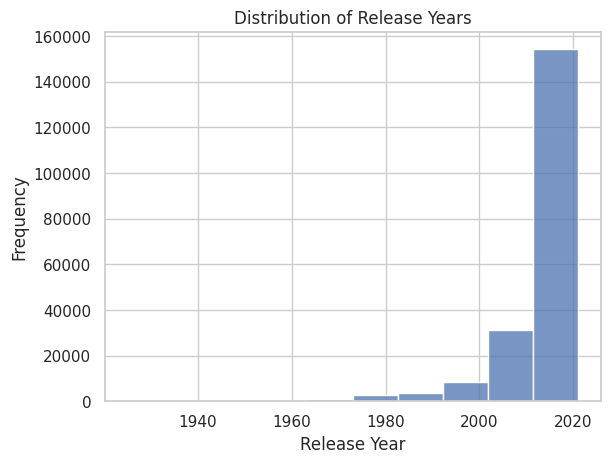

In [189]:
# Create a histogram for 'release_year' with 10 bins
# univariate numeric analysis: single variable used for plot
# continuous values variable: 'release_year'
# Data Type: numerical
sns.histplot(result_df['release_year'], bins=10)
# Customize the plot
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Business Insights :
# The histogram of release_year reveals the distribution of content releases over the years,
# allowing the business to identify periods with high production and capitalize on trends in demand for fresh content during peak years.

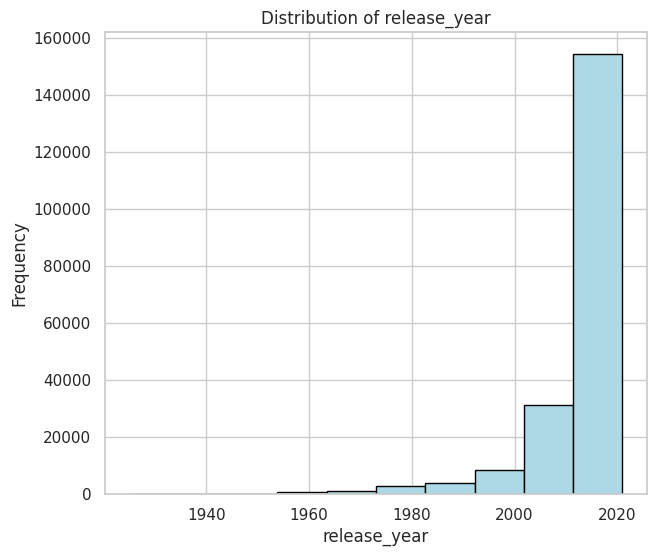

In [190]:
# Generate a histogram to analyze the distribution of release years in the dataset
# This helps in understanding the frequency of content releases over different years
# univariate numeric analysis: single variable used for plot
# continuous values variable: 'release_year'
# Data Type: numerical
plt.figure(figsize=(7, 6))
result_df['release_year'].plot(kind='hist', bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of release_year')
plt.xlabel('release_year')
plt.ylabel('Frequency')
plt.show()


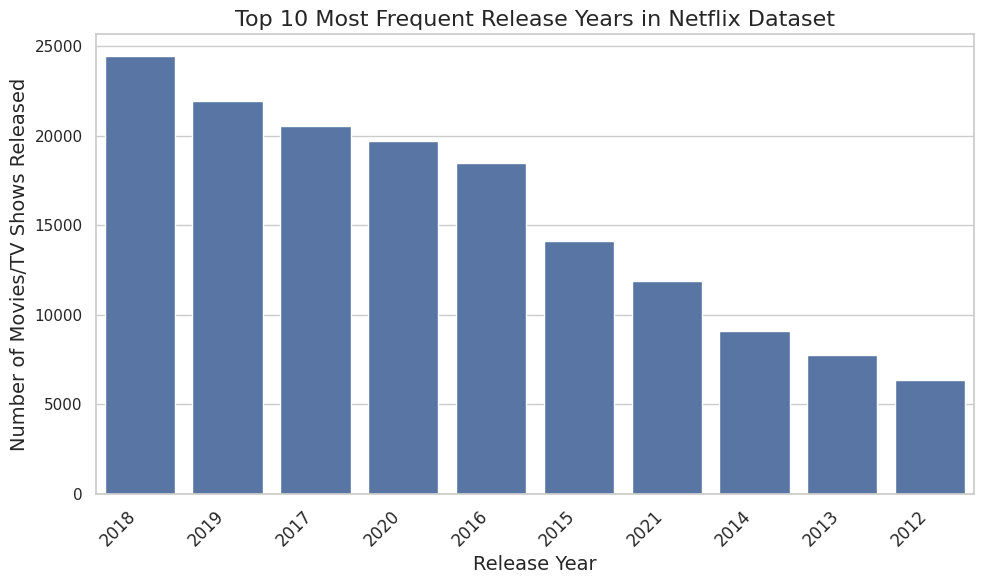

In [191]:
# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create a countplot to visualize the top 10 release years
# univariate numeric analysis: single variable used for plot
# converted continuous values variable to categorical values using value_counts function: 'release_year'
# Data Type: numerical
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year',
              data=result_df,
              order=result_df['release_year'].value_counts().index[:10])

# Set labels and title for clarity
plt.title('Top 10 Most Frequent Release Years in Netflix Dataset', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies/TV Shows Released', fontsize=14)

# Rotate x-axis labels for better readability and adjust the size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Business Insight:
# This enhanced plot gives a clearer view of the top 10 release years and provides better readability.
# By analyzing these years, businesses can understand key periods of activity in content release, aiding decisions on future investments or content strategy adjustments.

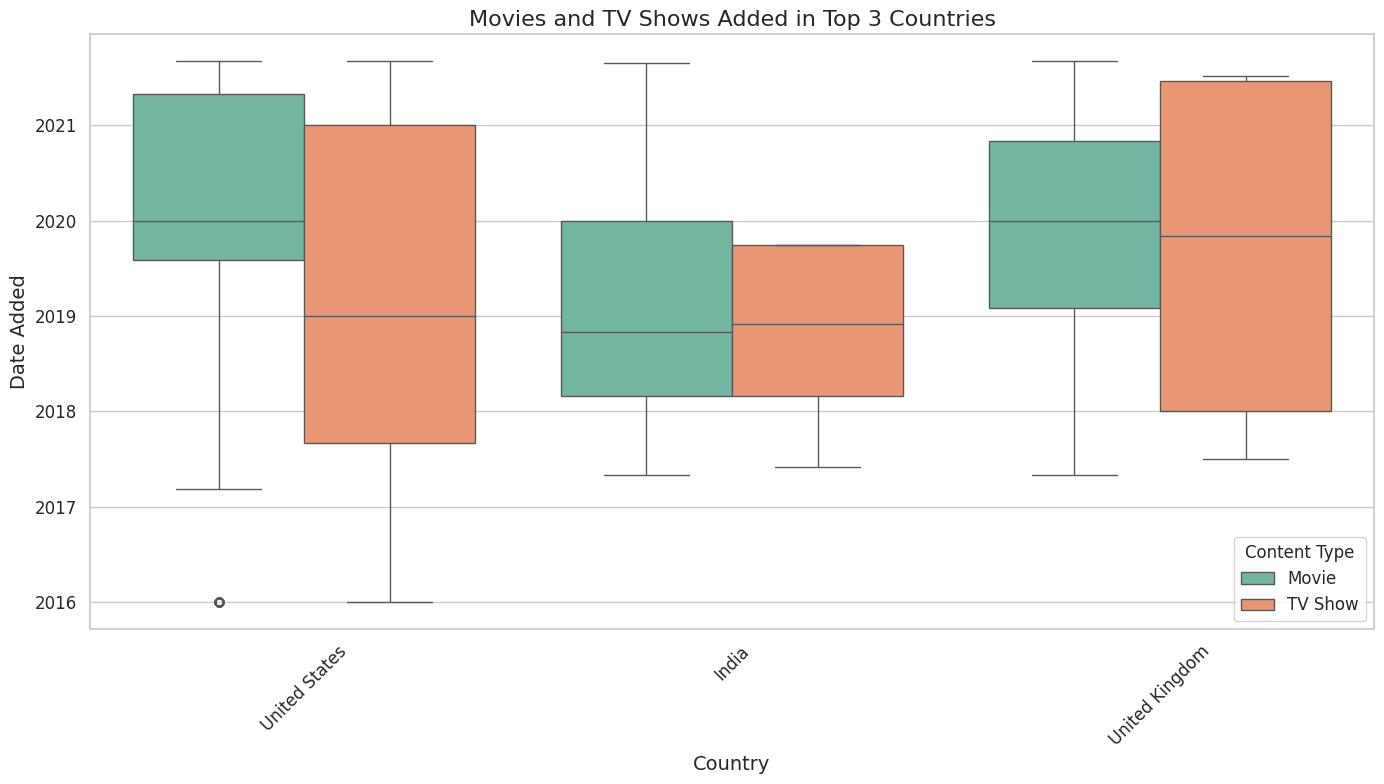

In [192]:
# Select top 50 years based on the frequency of 'date_added' and top 3 countries by 'country' count
top_50_yr = result_df['date_added'].value_counts().index[:50]
top_3_country = result_df['country'].value_counts().index[:3]

# Filter data for the top years and countries
top_data = result_df[result_df['date_added'].isin(top_50_yr) & result_df['country'].isin(top_3_country)]

# Plotting the boxplot with improved aesthetics
# multivariate analysis: 'country' : categorical, 'date_added' : continous, 'type': categorical
# Data Type: CCN
plt.figure(figsize=(14, 8))
sns.boxplot(x='country', y='date_added', hue='type', data=top_data, palette='Set2')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Date Added', fontsize=14)
plt.title('Movies and TV Shows Added in Top 3 Countries', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Content Type', fontsize=12)
plt.tight_layout()
plt.show()

# The relationship between 'country' and 'date_added' reveals that countries with larger moves and TV Shows added over a longer particular data range.

# Business Insight:
# The visualization helps identify which countries are adding the most content (movies/TV shows) over time,
# enabling Netflix to focus on high-performing regions for partnerships and promotions.

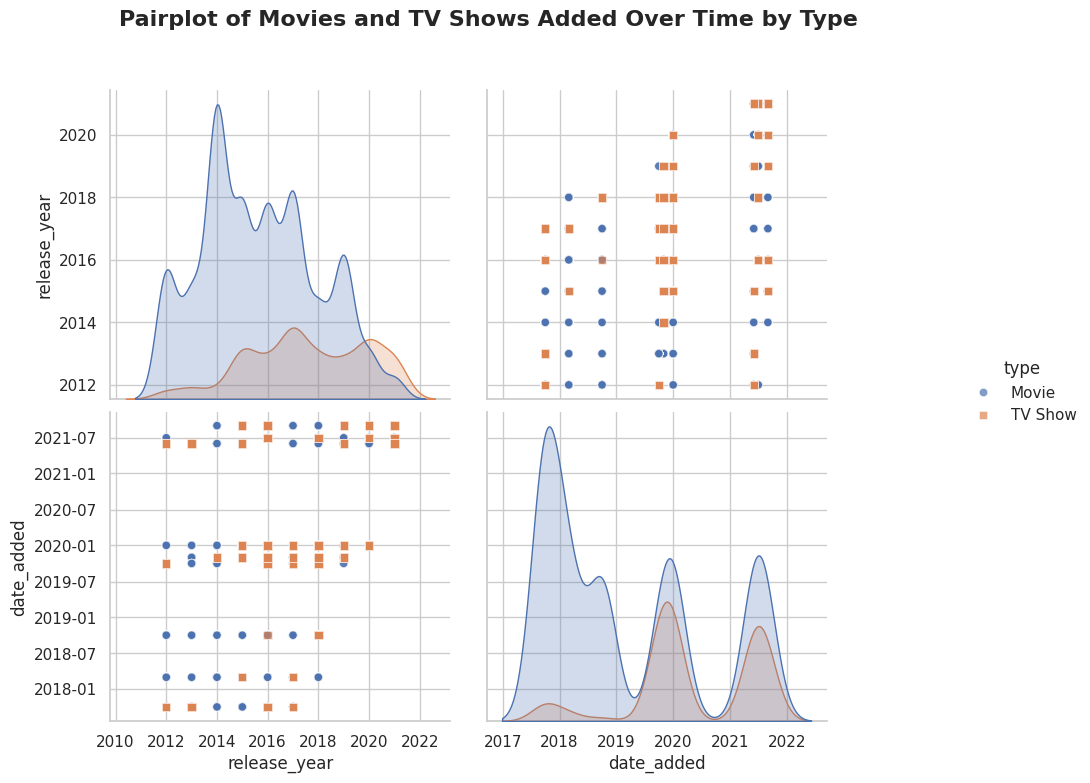

In [193]:
# Select top 10 years based on date_added and release_year
top_10_movies_added = result_df['date_added'].value_counts().index[:10]
top_10_movies_released = result_df['release_year'].value_counts().index[:10]

# Filter the data for visualization
top_data = result_df.loc[(result_df["date_added"].isin(top_10_movies_added)) &
                          (result_df["release_year"].isin(top_10_movies_released))]

# Pairplot visualization
# bivariate  numeric analysis: 'date_added' and 'release_year' variables used for plot
# continuous values variable: 'date_added' and 'release_year'
# Data Type: numerical
pairplot = sns.pairplot(
    data=top_data,
    vars=['release_year', 'date_added'],
    hue='type',
    markers=["o", "s"],
    plot_kws={'alpha': 0.7}
)

# Enhance the appearance
pairplot.fig.set_size_inches(12, 8)
pairplot.fig.suptitle("Pairplot of Movies and TV Shows Added Over Time by Type", y=1.02, fontsize=16, fontweight='bold')
pairplot.fig.subplots_adjust(top=0.92)

# Display the plot
plt.show()

# Business Insight:
# The pairplot highlights the relationship between the year content was added and its release year.
# By distinguishing between movies and TV shows, Netflix can analyze whether they are introducing more recent or older content,
# which can inform decisions on content acquisition.

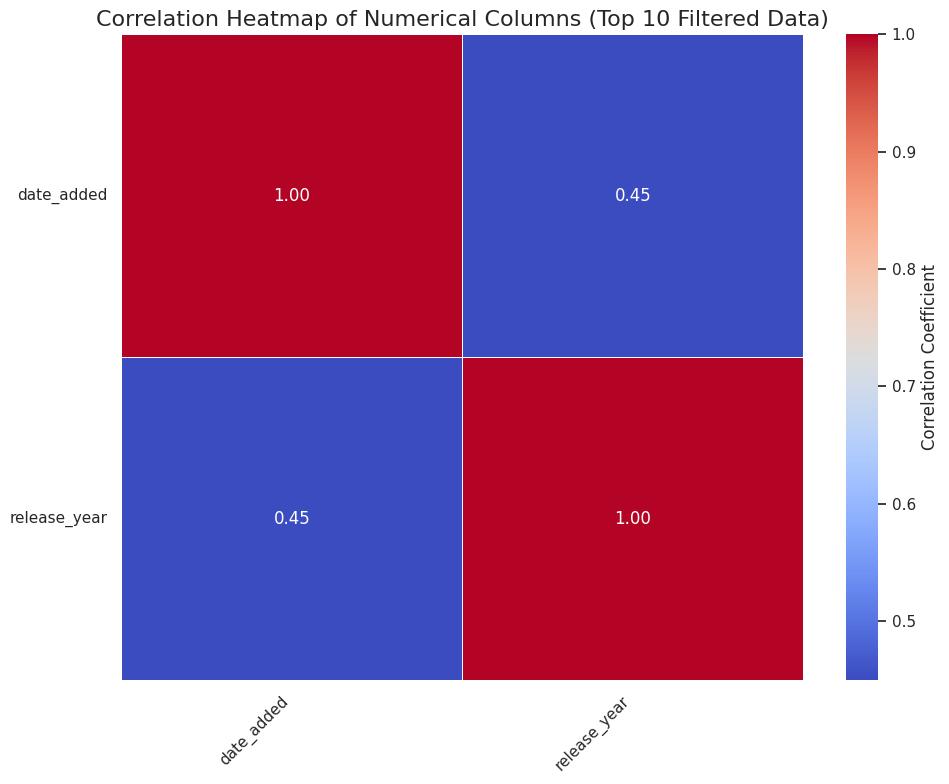

In [194]:
# Select top 10 years based on 'date_added' and 'release_year'
top_10_dates_added = result_df['date_added'].value_counts().index[:10]
top_10_release_years = result_df['release_year'].value_counts().index[:10]

# Filter the data for visualization
filtered_data = result_df.loc[
    (result_df["date_added"].isin(top_10_dates_added)) &
    (result_df["release_year"].isin(top_10_release_years))
]

# Select only numerical columns for correlation analysis
numerical_data = filtered_data.select_dtypes(include=['float', 'int', 'datetime64'])

# Calculate correlation
correlation_matrix = numerical_data.corr()

# Create and customize the heatmap
# bivariate  numeric analysis: 'date_added' and 'release_year' variables used for plot
# continuous values variable: 'date_added' and 'release_year'
# Data Type: numerical
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation Heatmap of Numerical Columns (Top 10 Filtered Data)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Business Insight:
# The heatmap provides insights into how different numerical features (e.g., release year, date added) relate to each other.
# Identifying these correlations helps to understand how changes in one variable, such as the release year, might affect other aspects of Netflix's data,
# such as the number of titles added or user engagement.

# **Data Insights**

**Question 1**: What type of content is available in different countries?

In [195]:
# Filter Movies and TV Shows separately and count occurrences by country
Movies_Df = result_df[result_df['type'] == 'Movie'].groupby('country').size().reset_index(name='Movie_Count')
TVShows_Df = result_df[result_df['type'] == 'TV Show'].groupby('country').size().reset_index(name='TVShow_Count')

# Identify Genre Preferences by Country
genre_preferences_by_country = (
    result_df.groupby('country')['listed_in']
    .apply(lambda x: x.value_counts().sort_values(ascending=False).head(3))
    .reset_index(name='Genre_Count')
)
#print("Top 3 Genres per Country:\n", genre_preferences_by_country)
# Initialize an empty list to store results
results = []
# Recommendation for New Content Based on Movie and TV Show Popularity
def calcMoviesToTVShowsRatio(country):
    # Fetch the number of Movies and TV Shows for the given country
    movies_count = Movies_Df.loc[Movies_Df['country'] == country]['Movie_Count']
    tv_shows_count = TVShows_Df.loc[TVShows_Df['country'] == country, 'TVShow_Count']

    # Handle missing data by assigning 0 if no value is found for the country
    if not movies_count.empty:
        movies_count = movies_count.iloc[0]
    else:
        movies_count = 0

    if not tv_shows_count.empty:
        tv_shows_count = tv_shows_count.iloc[0]
    else:
        tv_shows_count = 0

    # Calculate the total content (Movies + TV Shows)
    total_content = movies_count + tv_shows_count

    # Calculate the ratio of Movies vs. TV Shows as a percentage
    if total_content > 0:
       movies_ratio = (movies_count / total_content) * 100
       tv_shows_ratio = (tv_shows_count / total_content) * 100
    else:
       movies_ratio = tv_shows_ratio = 0

    # Determine the dominant content type (Movies or TV Shows) and fetch top genres accordingly
    if movies_ratio >= tv_shows_ratio:
      genre_preferences_by_country_and_type = (
             result_df[(result_df['type'] == 'Movie') & (result_df['country'] == country)].groupby('country')['listed_in']
            .apply(lambda x: x.value_counts().sort_values(ascending=False).head(3))
            .reset_index(name='Genre_Count')
      )
      genre_list = genre_preferences_by_country_and_type.loc[genre_preferences_by_country_and_type['country'] == country][country]
      for genre in genre_list:
            results.append([country, 'Movie', f"{movies_ratio:.2f}%", genre])
      #print(f"In {country} country, Movies are the dominant content type, accounting for {movies_ratio:.2f}% of total content.The top genres for Movies in {country} are: {genre_list}.")

    else:
      genre_preferences_by_country_and_type = (
             result_df[(result_df['type'] == 'TV Show')  & (result_df['country'] == country)].groupby('country')['listed_in']
            .apply(lambda x: x.value_counts().sort_values(ascending=False).head(3))
            .reset_index(name='Genre_Count')
      )
      genre_list = genre_preferences_by_country_and_type.loc[genre_preferences_by_country_and_type['country'] == country][country]
      for genre in genre_list:
            results.append([country, 'TV Show', f"{tv_shows_ratio:.2f}%", genre])
      #print(f"In {country} country, TV Shows are the dominant content type, accounting for {tv_shows_ratio:.2f}% of total content.The top genres for TV Shows in {country} are: {genre_list}.")

    #print("-" * 50)

# Iterate through unique countries in the dataset and calculate Movie to TV Show ratios
for country in result_df['country'].unique():
    calcMoviesToTVShowsRatio(country)

# Convert the results into a DataFrame for easier analysis
content_analysis_df = pd.DataFrame(results, columns=['Country', 'Content_Type', 'Content_Ratio', 'Top_Genres'])
print(content_analysis_df)

# Content type distribution by country
content_type_dist = result_df.groupby(['country', 'type']).size().reset_index(name='count')

# Business Insights:
# Insights into top genres per country allow businesses to prioritize localized content creation, ensuring relevance to regional audiences and improving customer satisfaction.
# The Movies-to-TV Shows ratio helps identify underrepresented content types in specific countries, guiding businesses to balance their offerings and maximize reach.

             Country Content_Type Content_Ratio                Top_Genres
0      United States        Movie        76.83%                  Comedies
1      United States        Movie        76.83%  Children & Family Movies
2      United States        Movie        76.83%                    Dramas
3     United Kingdom        Movie        90.50%                    Dramas
4     United Kingdom        Movie        90.50%        Action & Adventure
..               ...          ...           ...                       ...
537       Luxembourg      TV Show       100.00%    International TV Shows
538       Luxembourg      TV Show       100.00%                 TV Dramas
539          Senegal      TV Show       100.00%            Crime TV Shows
540          Senegal      TV Show       100.00%    International TV Shows
541          Senegal      TV Show       100.00%                 TV Dramas

[542 rows x 4 columns]


**Question 2**: How has the number of movies released per year changed over the last 20-30 years?

In [196]:
# Filter for only 'Movies' from the original dataset
# This selects rows where the 'type' column equals 'Movie', helping to isolate movie data from TV Shows.
movies_df = result_df[result_df['type'] == 'Movie']

# Extract the last 30 years of movie releases
# 'current_year' is assigned the current year (obtained using `pd.Timestamp.now().year`).
# The filtered data only includes movies released in the last 30 years.
current_year = pd.Timestamp.now().year
filtered_movies = movies_df[movies_df['release_year'] >= (current_year - 30)]

# Group by release year and count the number of movies released each year
# This creates a new DataFrame where each row represents a year and the number of movies released in that year.
movies_per_year = filtered_movies.groupby('release_year').size().reset_index(name='Movie_Count')

# Business Insights:
#By filtering movies released in the past 30 years, you can observe the growth or decline in movie production during that period.

**Question 3**: Comparison of tv shows vs. movies.

In [197]:
# Filter Movies and TV Shows separately and count occurrences by country
# This creates two DataFrames: one for Movies and one for TV Shows.
# It groups the data by 'country' and counts how many Movies and TV Shows each country has.Movies_Df = result_df[result_df['type'] == 'Movie'].groupby('country').size().reset_index(name='Movie_Count')
TVShows_Df = result_df[result_df['type'] == 'TV Show'].groupby('country').size().reset_index(name='TVShow_Count')

# Which countries have the highest number of TV Shows and Movies?
# Sort both DataFrames by the respective counts in descending order and select the top country with the most TV Shows and Movies.
top_tv_show_country = TVShows_Df.sort_values('TVShow_Count', ascending=False).head(1)
top_movie_country = Movies_Df.sort_values('Movie_Count', ascending=False).head(1)

# Print the countries with the most Movies and TV Shows.
print(f"Country with the most TV Shows: \n {top_tv_show_country}\n")
print(f"Country with the most Movies: \n {top_movie_country}")

# Business Insights:
# Identifying which country has the highest number of TV Shows and Movies helps businesses understand regional content preferences.
# This information can guide decisions on content localization or targeted marketing for regions with higher concentrations of particular content types.


Country with the most TV Shows: 
           country  TVShow_Count
99  United States         11618

Country with the most Movies: 
            country  Movie_Count
180  United States        38534


**Question 4**: What is the best time to launch a TV show?

In [198]:
# Count TV Shows added per month
# This filters the data for TV Shows only, then extracts the 'date_added' column and groups it by month.
# The result is a count of how many TV Shows were added in each month.
tv_shows_by_month = (
    result_df[result_df['type'] == 'TV Show']['date_added']
    .dt.month_name()
    .value_counts()
)

# Display the best month
# This prints the count of TV Shows added in each month, allowing us to see the most popular months for adding TV Shows.
print("TV Shows added by Month:\n", tv_shows_by_month)

# Business Insights:
# By counting how many TV Shows are added in each month, this analysis provides insights into the best months for releasing TV Shows.
# Understanding these patterns can help optimize content release schedules to maximize viewership and engagement during peak months.

TV Shows added by Month:
 date_added
December     5498
July         5251
August       5162
June         5048
September    4901
November     4595
April        4543
March        4352
January      4332
October      4255
May          4248
February     3963
Name: count, dtype: int64


**Question 5**: Analysis of actors/directors of different types of shows/movies.

In [199]:
# Group by 'type' and 'director', count the occurrences
director_analysis = result_df.groupby(['type', 'director']).size().reset_index(name='count')

# Sort by count to get top directors for each type
top_directors_movies = director_analysis[director_analysis['type'] == 'Movie'].sort_values(by='count', ascending=False).head(10)
top_directors_tvshows = director_analysis[director_analysis['type'] == 'TV Show'].sort_values(by='count', ascending=False).head(10)

# Display the top directors
print("Top Directors for Movies:")
print(top_directors_movies)
print("\nTop Directors for TV Shows:")
print(top_directors_tvshows)


# Explode 'cast' column to separate individual actors
exploded_cast = result_df.assign(actor=result_df['cast'].str.split(', ')).explode('actor')

# Group by 'type' and 'actor', count occurrences
cast_analysis = exploded_cast.groupby(['type', 'actor']).size().reset_index(name='count')

# Sort by count to get top actors for each type
top_actors_movies = cast_analysis[cast_analysis['type'] == 'Movie'].sort_values(by='count', ascending=False).head(10)
top_actors_tvshows = cast_analysis[cast_analysis['type'] == 'TV Show'].sort_values(by='count', ascending=False).head(10)

# Display the top actors
print("Top Actors for Movies:")
print(top_actors_movies)
print("\nTop Actors for TV Shows:")
print(top_actors_tvshows)

# Business Insights:
# Analyzing the directors’ specialties (whether they’re more focused on movies or TV shows) allows production companies to make informed decisions about content strategy and team alignment.
# For example, directors with a strong TV show portfolio could be tapped for high-quality serial content, while movie-focused directors could bring innovation to cinematic releases.

Top Directors for Movies:
       type             director  count
4409  Movie     Steven Spielberg    813
4838  Movie     Yoshiyuki Tomino    428
3136  Movie      Martin Scorsese    419
4842  Movie      Youssef Chahine    414
1559  Movie         David Dhawan    367
1289  Movie  Cathy Garcia-Molina    356
2845  Movie       Lars von Trier    338
3811  Movie         Raja Gosnell    317
4606  Movie           Tom Hooper    306
3212  Movie                  McG    293

Top Directors for TV Shows:
         type                  director  count
5221  TV Show          Steven Spielberg  10954
5202  TV Show               Sarah Smith   5110
5250  TV Show          Yoshiyuki Tomino   4636
5235  TV Show         Toshiya Shinohara   4406
5003  TV Show              Bong Joon Ho   3362
5053  TV Show  Fernando González Molina   1627
4987  TV Show            Alfonso Cuarón   1581
5157  TV Show          Mike Clattenburg   1348
5073  TV Show               Hsu Fu-chun   1275
5230  TV Show            Thierry Do

**Question 6:** Does Netflix has more focus on TV Shows than movies in recent years



In [200]:
# Filter Movies and TV Shows and group by release_year
movies_by_year = result_df[result_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='Movie_Count')
tv_shows_by_year = result_df[result_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='TVShow_Count')

# Merge the two dataframes to compare the counts side by side
content_by_year = pd.merge(movies_by_year, tv_shows_by_year, on='release_year', how='outer').fillna(0)

# Calculate the total content count and ratio of movies to TV shows
content_by_year['Total_Content'] = content_by_year['Movie_Count'] + content_by_year['TVShow_Count']
content_by_year['Movies_Ratio'] = (content_by_year['Movie_Count'] / content_by_year['Total_Content']) * 100
content_by_year['TVShows_Ratio'] = (content_by_year['TVShow_Count'] / content_by_year['Total_Content']) * 100

# Display content distribution over the years
content_by_year

# Business Insights:
# The analysis of movie and TV show counts by release year reveals trends in content production.
# By tracking the ratio of movies to TV shows over the years, businesses can identify shifts in consumer preferences or production priorities.
# For example, a rise in TV show production could indicate a growing demand for serialized content, while an increase in movie production could signify a focus on high-budget, cinematic releases.



#### RECOMMENDATIONS ####

# Increase Focus on TV Shows in Recent Years: Since the proportion of TV Shows has been increasing, especially from 2020 onwards (more than 50%),
# focus on expanding the TV Show library to cater to the growing demand.

# Content Strategy Adjustment for 2020-2021: In 2020 and 2021, TV Shows surpassed Movies in terms of total content, indicating a shift in viewer preferences.
# A stronger push for TV Shows might be needed in marketing and partnerships.

# Expand Content Diversity for Older Years: The data shows that older years (e.g., 1942-1945) have a very high ratio of movies.
# This suggests that historical or classic movies are more prominent in older years, so investing in revamping classic movie content could attract nostalgia-driven audiences.

,release_year,Movie_Count,TVShow_Count,Total_Content,Movies_Ratio,TVShows_Ratio
0,1925,0.0,1.0,1.0,0.000000,100.000000
1,1942,6.0,0.0,6.0,100.000000,0.000000
2,1943,5.0,0.0,5.0,100.000000,0.000000
3,1944,24.0,0.0,24.0,100.000000,0.000000
4,1945,12.0,1.0,13.0,92.307692,7.692308
...,...,...,...,...,...,...
69,2017,15069.0,5447.0,20516.0,73.449990,26.550010
70,2018,17060.0,7381.0,24441.0,69.800745,30.199255
71,2019,11926.0,10005.0,21931.0,54.379645,45.620355
72,2020,9608.0,10089.0,19697.0,48.779002,51.220998
